In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

df_list = []
for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        df_list.append(pd.read_csv(file))

master_df = pd.concat(df_list, ignore_index=True)
master_df.to_csv('PPG_Signal.csv', index=False)

#EDA (Exploratory Data Analysis)

In [3]:
df = pd.read_csv('PPG_Signal.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4192,4193,4194,4195,4196,4197,4198,4199,Mean_NBP_Sys,Mean_NBP_Dias
0,0.368627,0.360784,0.356863,0.352941,0.352941,0.349020,0.345098,0.341176,0.337255,0.329412,...,0.411765,0.427451,0.435294,0.439216,0.435294,0.427451,0.419608,0.407843,102.00000,64.097222
1,1.073314,1.104594,1.140762,1.178886,1.217009,1.255132,1.291300,1.325513,1.356794,1.385142,...,1.293255,1.309873,1.324536,1.337243,1.347996,1.357771,1.366569,1.374389,110.39804,48.978981
2,0.368627,0.360784,0.356863,0.352941,0.352941,0.349020,0.345098,0.341176,0.337255,0.329412,...,0.411765,0.427451,0.435294,0.439216,0.435294,0.427451,0.419608,0.407843,102.00000,64.097222
3,1.073314,1.104594,1.140762,1.178886,1.217009,1.255132,1.291300,1.325513,1.356794,1.385142,...,1.293255,1.309873,1.324536,1.337243,1.347996,1.357771,1.366569,1.374389,110.39804,48.978981
4,0.368627,0.360784,0.356863,0.352941,0.352941,0.349020,0.345098,0.341176,0.337255,0.329412,...,0.411765,0.427451,0.435294,0.439216,0.435294,0.427451,0.419608,0.407843,102.00000,64.097222


In [21]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,4192,4193,4194,4195,4196,4197,4198,4199,Mean_NBP_Sys,Mean_NBP_Dias
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.031910,1.028811,1.026817,1.026128,1.027141,1.028914,1.031775,1.035014,1.038635,1.042019,...,0.993811,0.988016,0.982437,0.978109,0.973798,0.969867,0.967148,0.965062,116.362132,60.156387
std,0.766712,0.761395,0.756565,0.752197,0.749078,0.747900,0.748697,0.752636,0.758189,0.765317,...,0.743738,0.738179,0.733126,0.728090,0.722872,0.718698,0.716658,0.715502,12.985118,9.274682
min,0.164223,0.161290,0.159335,0.157380,0.155425,0.153470,0.153470,0.153470,0.152493,0.151515,...,0.134897,0.134897,0.134897,0.134897,0.134897,0.133920,0.133920,0.133920,87.666667,39.291667
25%,0.396078,0.403922,0.403922,0.391984,0.403922,0.403922,0.407843,0.407843,0.407843,0.403922,...,0.395894,0.393939,0.392157,0.393939,0.396078,0.400000,0.403922,0.401760,109.000000,54.322314
50%,0.637295,0.629469,0.631373,0.633333,0.631373,0.631373,0.631373,0.629412,0.637255,0.658824,...,0.616762,0.598160,0.582353,0.590196,0.590196,0.584314,0.576471,0.574510,114.284582,61.592166
75%,1.529814,1.626588,1.667644,1.650049,1.595308,1.610948,1.582600,1.555230,1.615836,1.635386,...,1.435973,1.423265,1.412512,1.447703,1.475073,1.524927,1.522972,1.508309,123.390010,65.563228
max,2.900293,2.920821,2.928641,2.923754,2.908113,2.882698,2.847507,2.802542,2.747801,2.686217,...,3.135875,3.149560,3.165200,3.177908,3.184751,3.183773,3.173998,3.154448,164.577621,77.899401


In [17]:
df.isnull().sum()

0                0
1                0
2                0
3                0
4                0
                ..
4197             0
4198             0
4199             0
Mean_NBP_Sys     0
Mean_NBP_Dias    0
Length: 4202, dtype: int64

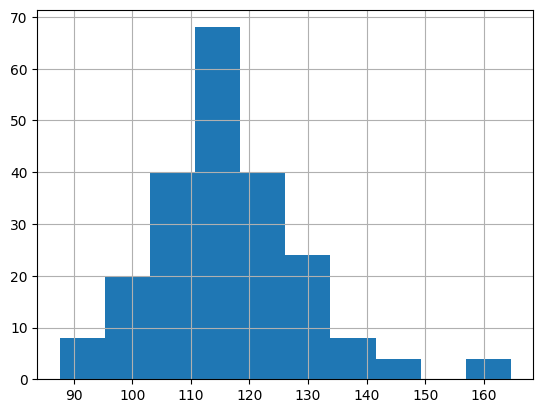

In [6]:
df['Mean_NBP_Sys'].hist()
plt.show()

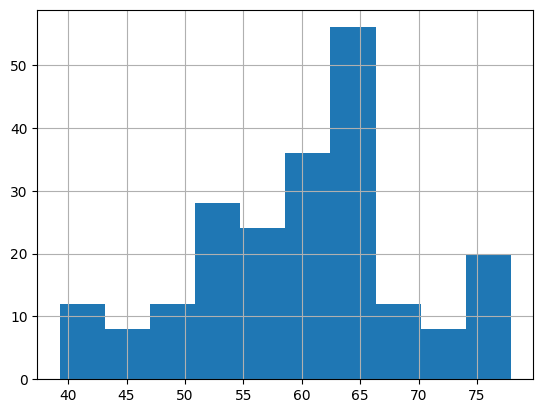

In [7]:
df['Mean_NBP_Dias'].hist()
plt.show()

# Pre-Processing

In [8]:
# data_coloumn = df.drop(columns=[col for col in df.columns if col not in ['Mean_NBP_Sys', 'Mean_NBP_Dias']])
# data_coloumn

X = df.drop(['Mean_NBP_Sys', 'Mean_NBP_Dias'], axis=1)
y_systolic = df['Mean_NBP_Sys']
y_diastolic = df['Mean_NBP_Dias']

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X = imputer.fit_transform(X)
X_train, X_test, y_systolic_train, y_systolic_test, y_diastolic_train, y_diastolic_test = train_test_split(X, y_systolic, y_diastolic, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training

In [19]:
lr_systolic = LinearRegression()
lr_systolic.fit(X_train, y_systolic_train)

lr_diastolic = LinearRegression()
lr_diastolic.fit(X_train, y_diastolic_train)

rf_systolic = RandomForestRegressor(n_estimators=100, random_state=42)
rf_systolic.fit(X_train, y_systolic_train)

rf_diastolic = RandomForestRegressor(n_estimators=100, random_state=42)
rf_diastolic.fit(X_train, y_diastolic_train)

svr_systolic = SVR(kernel='linear', gamma='auto')
svr_systolic.fit(X_train, y_systolic_train)

svr_diastolic = SVR(kernel='linear', gamma='auto')
svr_diastolic.fit(X_train, y_diastolic_train)

# Prediction
y_systolic_pred_lr = lr_systolic.predict(X_test)
y_diastolic_pred_lr = lr_diastolic.predict(X_test)

y_systolic_pred_rf = rf_systolic.predict(X_test)
y_diastolic_pred_rf = rf_diastolic.predict(X_test)

y_systolic_pred_svr = svr_systolic.predict(X_test)
y_diastolic_pred_svr = svr_diastolic.predict(X_test)

# Evaluation
print("Linear Regression Systolic RMSE:", np.sqrt(mean_squared_error(y_systolic_test, y_systolic_pred_lr)))
print("Linear Regression Systolic R2:", r2_score(y_systolic_test, y_systolic_pred_lr))

print("Linear Regression Diastolic RMSE:", np.sqrt(mean_squared_error(y_diastolic_test, y_diastolic_pred_lr)))
print("Linear Regression Diastolic R2:", r2_score(y_diastolic_test, y_diastolic_pred_lr))

print("Random Forest Systolic RMSE:", np.sqrt(mean_squared_error(y_systolic_test, y_systolic_pred_rf)))
print("Random Forest Systolic R2:", r2_score(y_systolic_test, y_systolic_pred_rf))

print("Random Forest Diastolic RMSE:", np.sqrt(mean_squared_error(y_diastolic_test, y_diastolic_pred_rf)))
print("Random Forest Diastolic R2:", r2_score(y_diastolic_test, y_diastolic_pred_rf))

print("SVR Systolic RMSE:", np.sqrt(mean_squared_error(y_systolic_test, y_systolic_pred_svr)))
print("SVR Systolic R2:", r2_score(y_systolic_test, y_systolic_pred_svr))

print("SVR Diastolic RMSE:", np.sqrt(mean_squared_error(y_diastolic_test, y_diastolic_pred_svr)))
print("SVR Diastolic R2:", r2_score(y_diastolic_test, y_diastolic_pred_svr))


Linear Regression Systolic RMSE: 5.4451534134375374e-14
Linear Regression Systolic R2: 1.0
Linear Regression Diastolic RMSE: 7.260380153919143e-14
Linear Regression Diastolic R2: 1.0
Random Forest Systolic RMSE: 1.0632330218658301
Random Forest Systolic R2: 0.9923986369939207
Random Forest Diastolic RMSE: 0.83696989911341
Random Forest Diastolic R2: 0.9902935164480664
SVR Systolic RMSE: 0.10005003103347865
SVR Systolic R2: 0.9999326916389933
SVR Diastolic RMSE: 0.10001577870729322
SVR Diastolic R2: 0.999861394875993
